In [53]:
!pip install pandas

In [54]:
!pip install matplotlib

In [55]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install numpy seaborn

Note: you may need to restart the kernel to use updated packages.


<h1 style="color: blue;"># 가. 데이터의 종류</h1>

1. 연속형 데이터
2. 이산형 데이터
3. 범주형 데이터
4. 순서형 데이터
5. 이진 데이터
6. 시계열 데이터(이후 자세히 다룬다)
7. 공간 데이터

## 1. 연속형 데이터

연속형 데이터(Continuous data)는 연속적인 값으로 이루어진 데이터입니다. 이 데이터는 무한개 의 값을 가지며 소수점을 포함하는 실수 값으로 표현됩니다. 예를 들어 온도, 길이, 시간 등이 연속 형 데이터의 대표적인 예시입니다.

### *히스토그램* 

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#데이터셋 불러오기
data = pd.read_csv('../data/BlackFriday.csv')

In [59]:
#User_ID별 구매 총 금액 계산
user_total_spent = data.groupby('User_ID')['Purchase'].sum()

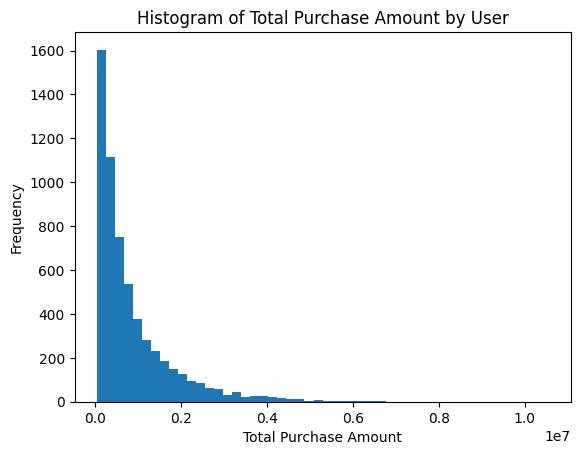

In [60]:
#히스토그램 그리기
plt.hist(user_total_spent, bins=50)
plt.title("Histogram of Total Purchase Amount by User")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency")
plt.show()

### *밀도 그래프*

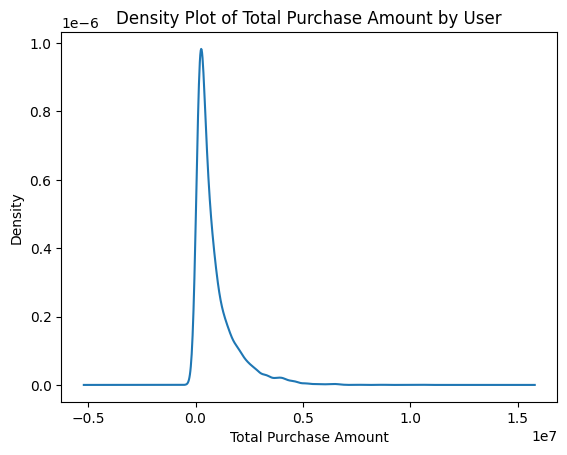

In [61]:
#밀도 그래프 그리기
plt.figure()
user_total_spent.plot.kde()
plt.title("Density Plot of Total Purchase Amount by User")
plt.xlabel("Total Purchase Amount")
# ylabel은 kde()안에서 수행되며 확률밀도를 계산하여 표기
plt.show()

### *정규분포 그래프*

정규 분포는 통계학에서 가장 중요하고 많이 사용되는 분포 중 하나입니다.
그래프를 그리면 종모양으로 나타나며, 대부분의 자연 현상에서 나타나는 데이터 분포와 비슷합니다.

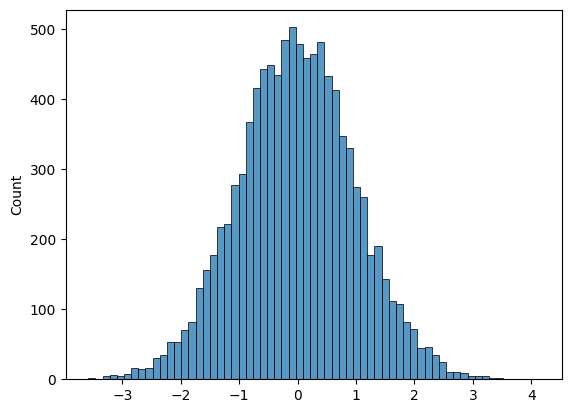

평균:  -0.01903185062891825
표준편차:  0.9985525700351587


In [62]:
#정규분포를 따르는 데이터 생성
#정규분포를 무작위로 만드는 과정
data = np.random.normal(loc=0, scale=1, size=10000)

#데이터 분포 시각화
sns.histplot(data)
plt.show()

#데이터 통계 지표 계산
mean = np.mean(data)
std = np.std(data)
print("평균: ", mean)
print("표준편차: ", std)

#### 정규분포의 여러가지 시각화

[-0.5262445   0.43877978  0.58305394 ...  0.46125529 -1.19362198
 -0.13698311]


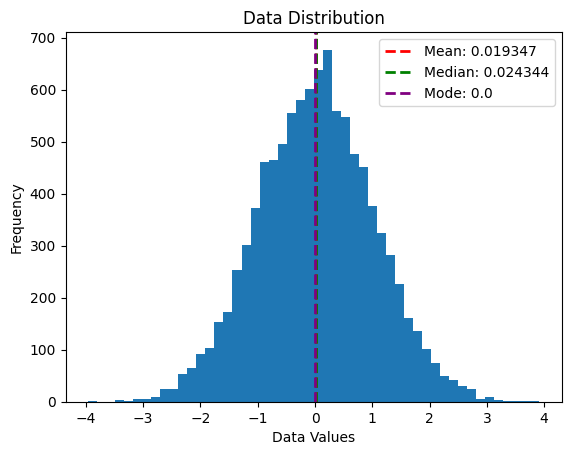

In [63]:
#데이터 생성
data = np.random.normal(loc=0, scale=1, size=10000)
print(data)

#중심 경향성 계산
#평균(mean), 중앙값(median), 최빈값(mode)
mean = np.mean(data)
median = np.median(data)
mode = np.round(np.mean(data))

#분포 시각화
fig, ax = plt.subplots()
ax.hist(data, bins=50)
ax.axvline(mean, color='red', linestyle='dashed', linewidth=2)
ax.axvline(median, color='green', linestyle='dashed', linewidth=2)
ax.axvline(mode, color='purple', linestyle='dashed', linewidth=2)
ax.legend(['Mean: {:2f}'.format(mean), 'Median: {:2f}'.format(median), 'Mode: {}'.format(mode)])
ax.set_xlabel('Data Values')
ax.set_ylabel('Frequency')
ax.set_title('Data Distribution')
plt.show()

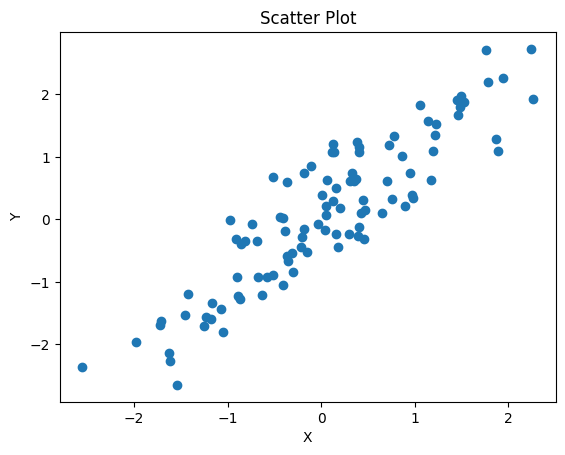

In [64]:
#두 변수 간의 상관관계 생성
np.random.seed(0)
x = np.random.normal(loc=0, scale=1, size=100)
y = x + np.random.normal(loc=0, scale=0.5, size=100)
#print(y)

# 산포도 그리기
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot')
plt.show()

### *이상치 실습*

이상치(outlier)는 대부분의 데이터가 모여 있는 부분에서 벗어나 극단적인 값으로 나타나는 데이터를 의미합니다.
이상치가 존재하면 데이터 분석 결과에 영향을 미치거나 잘못된 결과를 도출할 수 있으므로 주의해야 합니다.

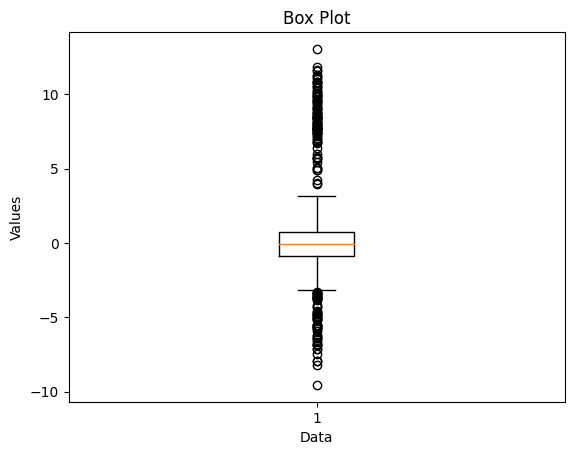

In [65]:
#데이터 생성
data = np.concatenate([np.random.normal(0, 1, 900),
                      np.random.normal(8, 2, 100),
                      np.random.normal(-4, 2, 100)])

#상자 그림(Box Plot) 시각화
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot')
plt.show()

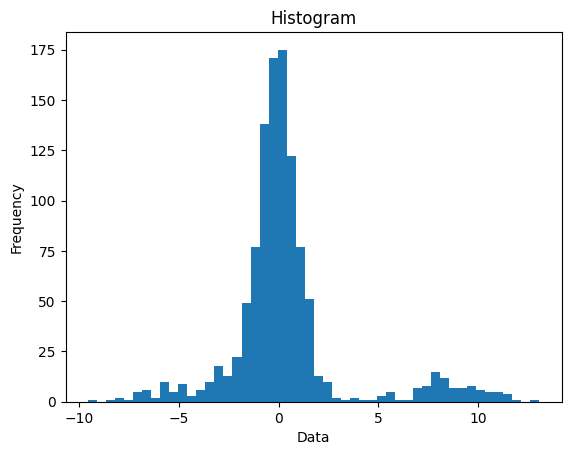

In [66]:
# 히스토그램(Histogram) 시각화
fig, ax = plt.subplots()
ax.hist(data, bins=50)
ax.set_xlabel('Data')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')
plt.show()

### *상관관계 실습*

상관관계는 두 변수 간에 어떤 관련성이 있는지를 나타내는 지표입니다. 상관관계는 일반적으로 두 변수가 함께 변화하는 경향이 있는지, 그리고 그 관계가 얼마나 강한지를 파악하기 위해 사용됩니다.

상관관계는 두 변수 간의 관련성을 -1부터 1사이의 값으로 나타냅니다. 값이 1에 가까울수록 두 변수는 양의 상관관계가 있으며, 즉 한 변수가 증가하면 다른 변수도 증가하는 경향이 있습니다. 값이 -1에 가까울수록 두 변수는 음의 상관관계가 있으며, 한 변수가 증가하면 다른 변수는 감소하는 경향이 있습니다. 반면 값이 0에 가까울수록 두 변수는 상관관계가 없다고 할 수 있습니다.

[ 0.3280058   0.27354439 -5.40552547  3.71363417 -3.89095761  0.90180014
  2.84109556 -2.0498863  -2.83515828 -2.40142982  0.77785846  4.02418152
 -0.81916728 -2.82682317  0.80193715 -1.70920329 -0.73685094  1.42111051
  1.05469634 -1.45512275 -2.77763052  0.11952736  0.18956083 -1.55373339
  0.12153606  0.7902456  -0.52334518 -3.36898556 -1.73329117 -2.07190812
 -0.65253522  3.96455938 -5.93033419  0.81711953  0.5576325   3.73912245
 -0.47875106 -0.84211552  0.49795967  1.21120932 -2.04582695  1.29024936
 -5.28285592  1.3797174   6.21510142  0.29950664  3.01527441 -0.33307213
 -0.9620726   0.87283671  2.60224759 -0.75852554 -0.9795864  -2.21855379
  1.47713675  2.98025536 -0.15147188  0.7425504   2.1740442  -4.16472565
 -2.09406018  0.67350587 -0.54748674 -0.60271344 -3.95582245  0.84901319
 -1.11391153 -2.3814524   5.15728548  2.29168003  0.22525978 -0.30093321
 -0.39797945  0.90706005 -2.56195699  2.29299464 -4.92237875 -0.49752268
  0.79648363 -2.91743252  0.95662764  0.14819201  1

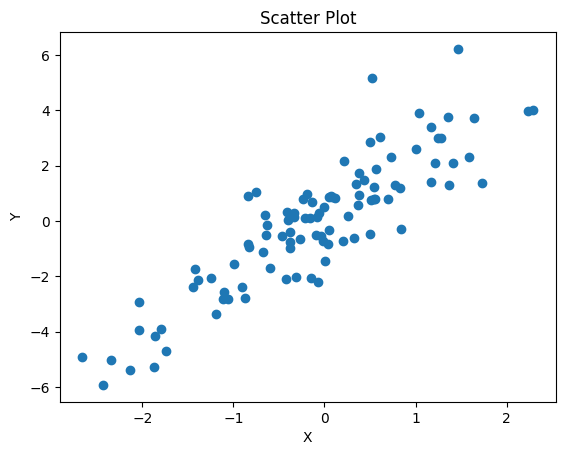

In [67]:
#데이터 생성
np.random.seed(2)
x = np.random.normal(loc=0, scale=1, size=100)
y = 2 * x + np.random.normal(loc=0, scale=1, size=100)
print(y)

# 선점도 시각화 
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot')
plt.show()